[generator zbiorów uczących](https://editor.p5js.org/tomgrad/present/HMQm5flEA)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Linear:
    '''Warstwa liniowa - f(x)=Wx+b'''
    def __init__(self, inputs, outputs):
        '''
        inputs - liczba cech
        outputs - liczba klas
        '''
        self.b=np.zeros(outputs)
        self.w=2*np.random.rand(outputs, inputs)-1
    def forward(self, x):
        self.x=x
        return self.w@x+self.b
    def backward(self, grad):
        self.grad_w=np.outer(grad, self.x)
        self.grad_b=grad
        return grad@self.w
    def learn(self, learning_rate):
        self.w -= self.grad_w * learning_rate
        self.b -= self.grad_b * learning_rate        

In [3]:
class Softmax:
    '''Funkcja aktywacji zwracająca prawdopodobieństwa - znormalizowane wartości e^x'''
    def forward(self, x):
        x=np.exp(x)
        self.y=x/np.sum(x)
        return self.y
    def backward(self, grad):
        return grad*self.y*(1-self.y)

In [4]:
class CrossEntropyLoss:
    '''Funkcja straty - entropia krzyżowa'''
    def __call__(self, prob, correct):
        '''
        prob - wektor prawdopodobieństw
        correct - indeks właściwej klasy
        '''
        grad=np.zeros(prob.shape)
        grad[correct] = -1/prob[correct]
        return -np.log(prob[correct]), grad

In [5]:
class LinearClassifier:
    '''Klasyfikator liniowy'''
    def __init__(self, inputs, outputs):
        '''
        inputs - liczba cech
        outputs - liczba klas
        '''        
        self.l=Linear(inputs, outputs)
        self.s=Softmax()
        self.loss=CrossEntropyLoss()
    def forward(self, x):
        x=self.l.forward(x)
        x=self.s.forward(x)
        return x
    def train(self, X, Y, learning_rate):
        '''
        SGD epoch
        X, Y - zestaw uczący (cechy, klasy)
        learning_rate - szybkość uczenia
        '''
        order_list=[i for i in range(len(Y))]
        np.random.shuffle(order_list)
        total_loss=0
        for i in order_list:
            x=self.forward(X[i])
            loss, grad = self.loss(x, Y[i])
            total_loss+=loss
            grad=self.s.backward(grad)
            self.l.backward(grad)
            self.l.learn(learning_rate)
        return total_loss

In [6]:
data=loadtxt('lin01.txt')
X, Y = data[:,1:], data[:,0].astype('int')

In [7]:
model=LinearClassifier(2, max(Y)+1)

In [8]:
epochs=[]

In [9]:
for i in range(1000):
    epochs.append(model.train(X,Y, 1))

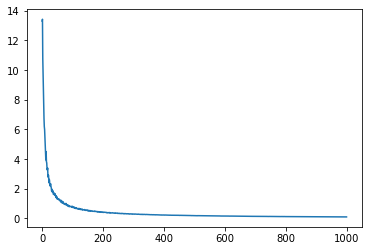

In [10]:
plot(epochs)

In [11]:
model.train(X,Y, 0.1)

0.09918254206067734

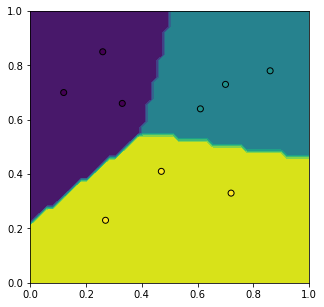

In [12]:
n=50 # rozdzielczość
z=zeros((n,n))
x=linspace(0,1,n)
for i in range(n):
    for j in range(n):
        z[i,j]=np.argmax(model.forward([x[j], x[i]]))
figsize(5,5)
contourf(x,x,z, vmin=0, vmax=max(Y));
scatter(X[:,0], X[:,1], c=Y, edgecolors=(0,0,0))

In [13]:
[model.forward(x) for x in X]

[array([9.99985552e-01, 1.38214646e-05, 6.26243354e-07]),
 array([9.99457395e-01, 5.42426535e-04, 1.78027523e-07]),
 array([0.9677358 , 0.03056477, 0.00169943]),
 array([0.00135245, 0.97135652, 0.02729103]),
 array([1.24413468e-04, 9.98455690e-01, 1.41989698e-03]),
 array([6.76442329e-07, 9.99833844e-01, 1.65479373e-04]),
 array([7.07144473e-04, 2.53477243e-02, 9.73945131e-01]),
 array([4.29305315e-04, 6.09265578e-05, 9.99509768e-01]),
 array([1.70448209e-08, 7.99808216e-03, 9.92001901e-01])]